# License Plate Recognition Step-by-Step
This notebook demonstrates license plate recognition using image processing and OCR. Each step visualizes the intermediate result for clarity.

In [4]:
# 1. Import Required Libraries
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2
from easyocr import Reader
import matplotlib.pyplot as plt

In [7]:
# 2. Load and Resize Image
img = cv2.imread('./images/image11.jpg')
img = cv2.resize(img, (800, 600))

In [8]:
# 3. Load Font for Text Display
fontpath = "./arial.ttf"
font = ImageFont.truetype(fontpath, 32)
text_color = (0, 255, 0, 0)  # Green text

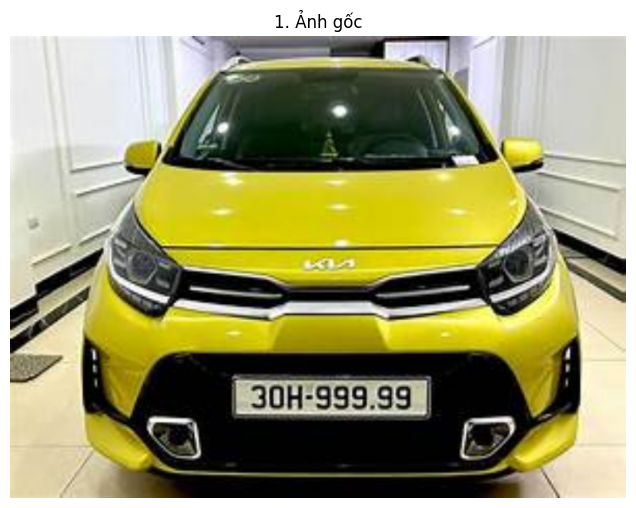

In [9]:
# 4. Display Original Image
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('1. Ảnh gốc')
plt.axis('off')
plt.show()

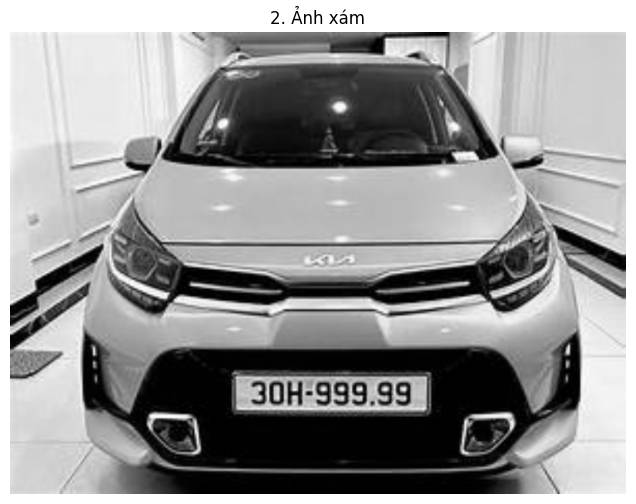

In [10]:
# 5. Convert to Grayscale
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,6))
plt.imshow(grayscale, cmap='gray')
plt.title('2. Ảnh xám')
plt.axis('off')
plt.show()

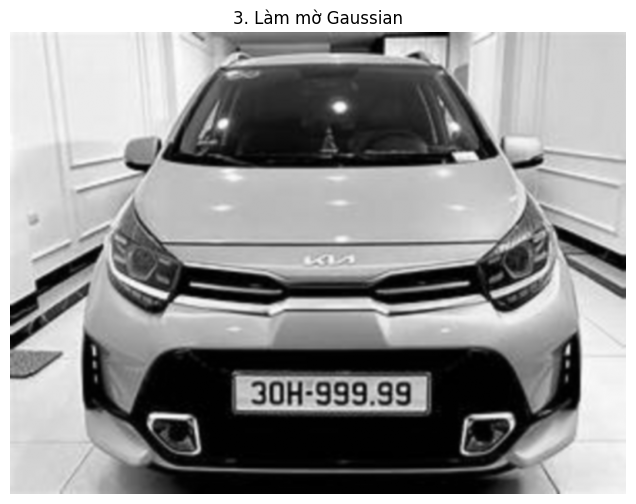

In [11]:
# 6. Apply Gaussian Blur
blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)
plt.figure(figsize=(8,6))
plt.imshow(blurred, cmap='gray')
plt.title('3. Làm mờ Gaussian')
plt.axis('off')
plt.show()

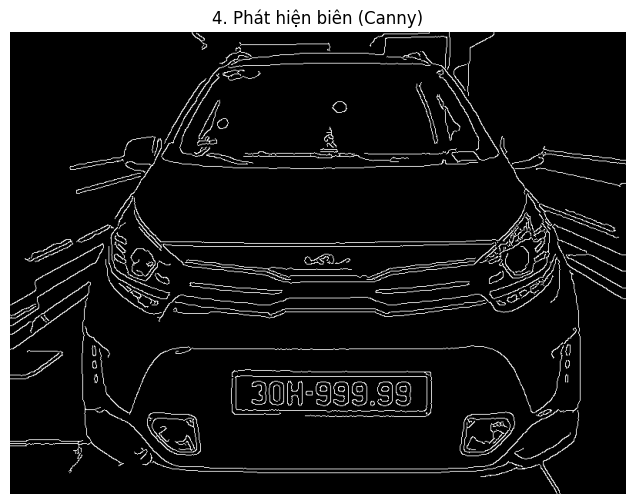

In [12]:
# 7. Perform Canny Edge Detection
edged = cv2.Canny(blurred, 10, 200)
plt.figure(figsize=(8,6))
plt.imshow(edged, cmap='gray')
plt.title('4. Phát hiện biên (Canny)')
plt.axis('off')
plt.show()

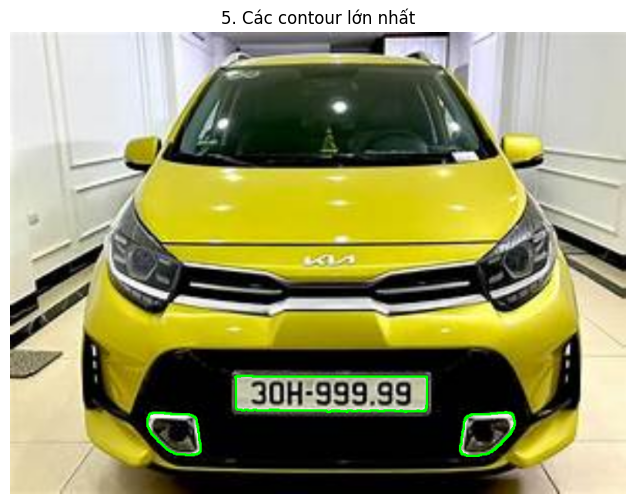

In [13]:
# 8. Find and Draw Contours
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('5. Các contour lớn nhất')
plt.axis('off')
plt.show()

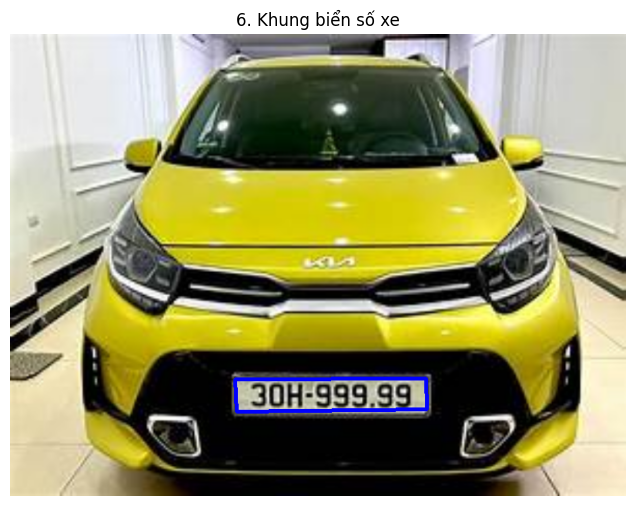

In [14]:
# 9. Detect License Plate Region
number_plate_shape = None
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        number_plate_shape = approx
        break
if number_plate_shape is not None:
    plate_img = img.copy()
    cv2.drawContours(plate_img, [number_plate_shape], -1, (255, 0, 0), 3)
    plt.figure(figsize=(8,6))
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title('6. Khung biển số xe')
    plt.axis('off')
    plt.show()
else:
    print('Không tìm thấy hình dạng biển số xe!')

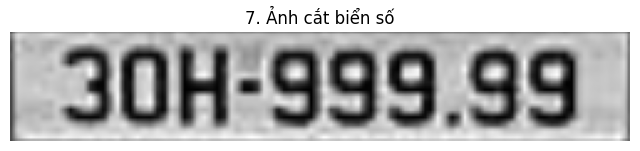

In [15]:
# 10. Extract License Plate ROI
if number_plate_shape is not None:
    (x, y, w, h) = cv2.boundingRect(number_plate_shape)
    number_plate = grayscale[y:y+h, x:x+w]
    plt.figure(figsize=(8,6))
    plt.imshow(number_plate, cmap='gray')
    plt.title('7. Ảnh cắt biển số')
    plt.axis('off')
    plt.show()
else:
    number_plate = None
    print('Không thể cắt ROI biển số vì không tìm thấy khung!')

In [16]:
# 11. Perform OCR on License Plate
if number_plate is not None:
    reader = Reader(['en'])
    detection = reader.readtext(number_plate)
else:
    detection = []

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\cuda\__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


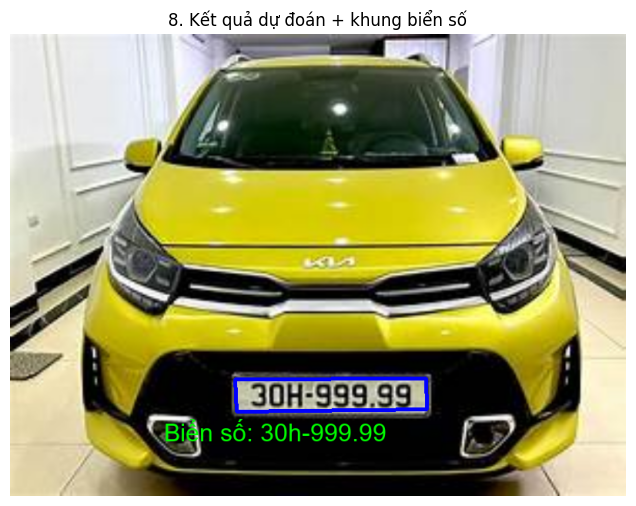

In [17]:
# 12. Display Final Result with Detected Plate Number
img_result = img.copy()
if number_plate_shape is not None:
    cv2.drawContours(img_result, [number_plate_shape], -1, (255, 0, 0), 3)
if len(detection) == 0:
    text = "Không thấy bảng số xe"
else:
    text = "Biển số: " + detection[0][1]
img_pil = Image.fromarray(img_result)
draw = ImageDraw.Draw(img_pil)
draw.text((200, 500), text, font=font, fill=text_color)
img_result = np.array(img_pil)
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.title('8. Kết quả dự đoán + khung biển số')
plt.axis('off')
plt.show()